In [7]:
from DeepStorm.Model import Model
from DeepStorm.Layers.Initializers import Xavier, He, UniformRandom, Constant
from DeepStorm.Layers.Conv import Conv2d
from DeepStorm.Layers.BatchNormalization import BatchNorm2d
from DeepStorm.Layers.Pooling import MaxPool2d
from DeepStorm.Layers.Flatten import Flatten
from DeepStorm.Layers.Dropout import Dropout
from DeepStorm.Layers.FullyConnected import Linear
from DeepStorm.Layers.ReLU import ReLU
from DeepStorm.Layers.SoftMax import SoftMax
from DeepStorm.Optimization.Loss import CrossEntropyLoss
from DeepStorm.Optimization.Optimizers import Adam, SgdWithMomentum, Sgd

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
input_folder_path = "Data/"
train_df = pd.read_csv(input_folder_path+"train.csv")[:100]
test_df = pd.read_csv(input_folder_path+"test.csv")

train_labels = train_df['label'].values
train_images = (train_df.iloc[:, 1:].values).astype('float32')
test_images = (test_df.iloc[:, :].values).astype('float32')

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                      stratify=train_labels, random_state=123,
                                                                      test_size=0.20)
train_images = train_images.reshape(train_images.shape[0], 28, 28)
val_images = val_images.reshape(val_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

train_images = train_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0

classes = 10

train_images = np.expand_dims(train_images, axis=1)
train_labels = train_labels.reshape(-1)
train_labels = np.eye(classes)[train_labels]
val_images = np.expand_dims(val_images, axis=1)
val_labels = val_labels.reshape(-1)
val_labels = np.eye(classes)[val_labels]

In [3]:
layers = [
    Conv2d(in_channels=1, out_channels=4,
           kernel_size=3, stride=1, padding='same'),
    BatchNorm2d(4),
    Dropout(probability=0.3),
    ReLU(),
    MaxPool2d(kernel_size=2, stride=2),
    Conv2d(in_channels=4, out_channels=4,
           kernel_size=3, stride=1, padding='same'),
    BatchNorm2d(4),
    ReLU(),
    MaxPool2d(kernel_size=2, stride=2),
    
    Flatten(),
    
    Linear(in_features=4*7*7, out_features=32),
#     Dropout(0.3),
    ReLU(),
    Linear(32, 10),
    SoftMax(),
]

model = Model(layers)

In [4]:
batch_size = 16
model.compile(optimizer=Adam(learning_rate=5e-3, mu=0.98, rho=0.999), loss=CrossEntropyLoss(),
              batch_size=batch_size, metrics=['accuracy'])

In [5]:
epochs = 50
history = model.fit(x_train=train_images, y_train=train_labels,
                    x_val=val_images, y_val=val_labels, epochs=epochs)

Epoch 1: 
Train loss: 48.68
Train accuracy: 0.1125
Val loss: 44.62
Val accuracy: 0.3

Epoch 2: 
Train loss: 30.83
Train accuracy: 0.2875
Val loss: 35.58
Val accuracy: 0.45

Epoch 3: 
Train loss: 27.67
Train accuracy: 0.45
Val loss: 33.69
Val accuracy: 0.45

Epoch 4: 
Train loss: 25.56
Train accuracy: 0.4875
Val loss: 40.19
Val accuracy: 0.35

Epoch 5: 
Train loss: 21.27
Train accuracy: 0.625
Val loss: 35.84
Val accuracy: 0.5

Epoch 6: 
Train loss: 20.04
Train accuracy: 0.6
Val loss: 32.34
Val accuracy: 0.5

Epoch 7: 
Train loss: 19.65
Train accuracy: 0.5625
Val loss: 28.50
Val accuracy: 0.55

Epoch 8: 
Train loss: 16.83
Train accuracy: 0.6875
Val loss: 30.42
Val accuracy: 0.55

Epoch 9: 
Train loss: 16.45
Train accuracy: 0.6625
Val loss: 23.70
Val accuracy: 0.6

Epoch 10: 
Train loss: 15.36
Train accuracy: 0.6875
Val loss: 29.18
Val accuracy: 0.65

Epoch 11: 
Train loss: 13.11
Train accuracy: 0.75
Val loss: 26.53
Val accuracy: 0.75

Epoch 12: 
Train loss: 11.56
Train accuracy: 0.8
Val 

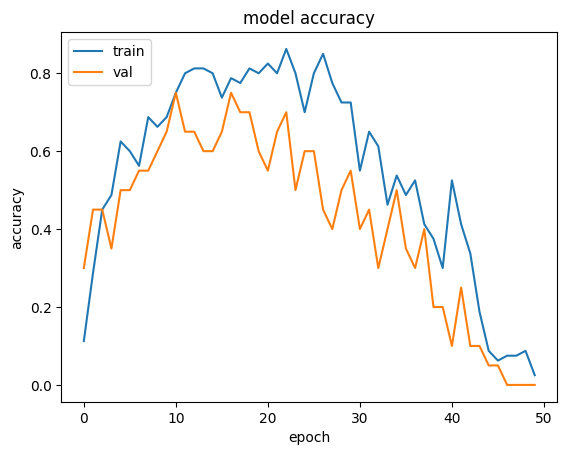

In [8]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()